/data/yjx/cache/conda/envs/finer/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/yjx/cache/conda/envs/finer/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/data/yjx/cache/conda/envs/finer/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


/data/yjx/cache/conda/envs/finer/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/yjx/cache/conda/envs/finer/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/data/yjx/cache/conda/envs/finer/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 5/5 [00:22<00:00,  4.43s/it]
The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast p

att_shape:[13, 18]


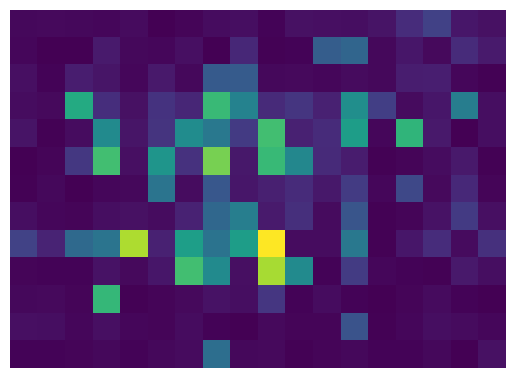

: 

In [ ]:
import matplotlib
# matplotlib.use('TkAgg')  # 设置交互式后端以显示图片
import matplotlib.pyplot as plt
from utils import *

from PIL import Image, ImageDraw
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
import torch
import matplotlib.pyplot as plt
from utils.util import *
from agents.qwen2_5_methods import rel_attention_qwen2_5

model_name = 'qwen2_5'
method_name = 'rel_att'
image_path = '/data/yjx/MLLM/UniFGVR/datasets/dogs_120/images_discovery_all_1/032.Kerry_Blue_Terrier/032.Kerry_Blue_Terrier_n02093859_393.jpg'
question = "Describe the most significant features that can identify the type of dog in the image, and ultimately tell me what kind of dog it is."
short_question = "Describe the most significant features that can identify the type of dog in the image, and ultimately tell me what kind of dog it is."
device = 'cuda'
model_path = '/home/Dataset/Models/Qwen/Qwen2.5-VL-7B-Instruct'


model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
                model_path,
                device_map="auto",
                attn_implementation="eager",
                torch_dtype=torch.float32,
            ).eval()

processor = AutoProcessor.from_pretrained(
    model_path,
    # trust_remote_code=True,
    # padding_side='left',
    # use_fast=True,
)


# Visualize the bounding box
image = Image.open(image_path).convert("RGB")


# question = "What is the pose of the woman with yellow backpack?\n(A) walking\n(B) running\n(C) squatting\n(D) standing\nAnswer with the option's letter from the given choices directly."
# short_question = "What is the pose of the woman with yellow backpack?\n(A) walking\n(B) running\n(C) squatting\n(D) standing\nAnswer with the option's letter from the given choices directly."
question = "Describe the most significant features that can identify the type of dog in the image, and ultimately tell me what kind of dog it is."
short_question = "Describe the most significant features that can identify the type of dog in the image, and ultimately tell me what kind of dog it is."
general_question = 'Write a general description of the image.'
prompt = f"<image>\nUSER: {question} Answer the question using a single word or phrase.\nASSISTANT:"
general_prompt = f"<image>\nUSER: {general_question} Answer the question using a single word or phrase.\nASSISTANT:"
# image_path = 'images/demo3.png'
# image = Image.open(image_path).convert("RGB")
# att_map = high_res(rel_attention_qwen2_5, image, prompt, general_prompt, model, processor)
att_map = rel_attention_qwen2_5(image, prompt, general_prompt, model, processor)
# important_tokens_info = get_important_image_tokens(att_map, inputs, model, threshold=1)
# print(f"图像token位置范围: {important_tokens_info['positions']}")
# print(f"重要stoken数量: {len(important_tokens_info['important_indices'])}")
# print(f"最高注意力权重: {important_tokens_info['important_weights'].max().item():.4f}")
# print(f"平均注意力权重: {important_tokens_info['important_weights'].mean().item():.4f}")
# print(f'att_map:{att_map}')
# print(f'att_map shape:{att_map.shape}')
plt.imshow(att_map, interpolation='none')
plt.axis('off')
plt.show()
torch.cuda.empty_cache()










